<a href="https://colab.research.google.com/github/Shreya-data/Play-Store-App-Reviews-Analysis/blob/main/playstore_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
play_store_data=pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
user_review_data=pd.read_csv("/content/drive/MyDrive/User Reviews.csv")


---
**Explore Play Store Dataset**
---

In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_data.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

---
**COLUMN NAMES OF PLAY STORE DATA**
---
**App**- Name of the apps.

**Category**- Category under which the app falls.

**Rating**- Applications rating in playstore.

**Reviews**- Number of reviews given to apps.

**Size**- Size of the apps.

**Installs**- Number of installs of the apps.

**Type**- app is free or paid.

**Price**- Price of the apps.

**Content Rating** - Appropriate target audience of the apps.

**Genres**- Genres under which the app fall.

**Last** **updated**- Date when the app last updated.

**Current** **Ver**- Current version of the apps.

**Android** **Ver**- The Android operating system the app is compatible with.

In [ ]:
print(f"There are total {play_store_data.shape[0]} rows and {play_store_data.shape[1]} columns in playstore dataframe.")

There are total 10841 rows and 13 columns in playstore dataframe.


In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Duplicate entry in play_store_data:",len(play_store_data[play_store_data.duplicated()])) #total number of duplicates

Duplicate entry in play_store_data: 483


In [ ]:
#Remove Duplicates from playstore database
play_store_data1 = play_store_data.drop_duplicates() #remove duplicate 
play_store_data1.shape #shape after removing duplicates

(10358, 13)

In [ ]:
def PlaystoreInfo():
  PSinfo_df = pd.DataFrame(index=play_store_data1.columns)
  PSinfo_df['Datatypes'] =  play_store_data1.dtypes
  PSinfo_df['Count of non-null values'] = play_store_data1.count()
  PSinfo_df['NaN values'] = play_store_data1.isnull().sum()
  PSinfo_df['% NaN Values'] = (PSinfo_df['NaN values']/len(play_store_data1)).round(4)*100 # or play_store_data1.isnull().mean()
  PSinfo_df['Unique_count'] = play_store_data1.nunique()
  return PSinfo_df
PlaystoreInfo() 


,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,10358,0,0.00,9660
Category,object,10358,0,0.00,34
Rating,float64,8893,1465,14.14,40
Reviews,object,10358,0,0.00,6002
Size,object,10358,0,0.00,462
Installs,object,10358,0,0.00,22
Type,object,10357,1,0.01,3
Price,object,10358,0,0.00,93
Content Rating,object,10357,1,0.01,6
Genres,object,10358,0,0.00,120


---
**Insights:**
---
From the above, we understand that except Rating columns, we are having a good dataset.

The number of null values are:

* **Rating** has 1465 null values which contributes 14.14% of the 
data.

* **Type** has 1 null value which contributes 0.01% of the data.

* **Content Rating** has 1 null value which contributes 0.01% of the data.

* **Current Ver** has 8 null values which contributes 0.08% of the data.

* **Android Ver** has 3 null values which contributes 0.03% of the data.

**We know that there is only one numeric type feature i.e. Rating.**

**Unique counts of Type and Content ratings are very small i.e. 3 and 6 respectively**

**Lets Explore The User Reviews Dataset**
---

In [ ]:
user_review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review_data.columns.values

array(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'], dtype=object)

---
**COLUMN NAMES OF USER REVIEWS DATA**
---
**App** - The name of the application.

**Translated_Review** -Review text in English.

**Sentiment** - tells us about a view or opinion of the user with respect to the application, which can be positive, neutral, or negative.

**Sentiment_Polarity** - Sentiment in numerical form, ranging from -1.00 to 1.00.

**Sentiment_Subjectivity** - Measure of the expression of opinions, evaluations, feelings, and speculations


In [ ]:
print(f"There are total {user_review_data.shape[0]} rows and {user_review_data.shape[1]} columns in User Reviews dataframe.")

There are total 64295 rows and 5 columns in User Reviews dataframe.


In [ ]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review_data.describe(include="all")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [ ]:
print("Duplicate entry in user_review_data:",len(user_review_data[user_review_data.duplicated()])) #total number of duplicates

Duplicate entry in user_review_data: 33616


In [ ]:
#Remove Duplicates from user_reviews database
user_review_data1 = user_review_data.drop_duplicates() #remove duplicate 
user_review_data1.shape #shape after removing duplicates

(30679, 5)

In [ ]:
def UserReviewInfo():
  URinfo_df = pd.DataFrame(index=user_review_data1.columns)
  URinfo_df['Datatypes'] =  user_review_data1.dtypes
  URinfo_df['Count of non-null values'] = user_review_data1.count()
  URinfo_df['NaN values'] = user_review_data1.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(user_review_data1)).round(4)*100 
  # or user_review_data1.isnull().mean()
  URinfo_df['Unique_count'] = user_review_data1.nunique()
  return URinfo_df
UserReviewInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,30679,0,0.00,1074
Translated_Review,object,29692,987,3.22,27994
Sentiment,object,29697,982,3.20,3
Sentiment_Polarity,float64,29697,982,3.20,5410
Sentiment_Subjectivity,float64,29697,982,3.20,4474


**Insights**
---

From the above, we understand that only for App column, we are having a good dataset.
There are so many of null values in dataset, we need to take care of that part.

The number of null values are:

* **Translated_Review** has 987 null values which contributes 3.22% of the data.
* **Sentiment** has 982 null values which contributes 3.20% of the data.

* **Sentiment_Polarity** has 982 null values which contributes 3.20% of the data.
* **Sentiment_Subjectivity** has 982 null values which contributes 3.20% of the data.

By Datatypes column, We know that there are two numeric type feature i.e. *Sentiment_Polarity* and *Sentiment_Subjectivity*.

Unique count of *Sentiment* are very small i.e. 3 .

**Data Filtering and Each Columns Data Operation**
---

**Filtering of User Reviews DataFrame**

In [ ]:
user_review_data2 = user_review_data1.dropna(subset=["Translated_Review"],how="all")
user_review_data2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_review_data3 = user_review_data2.drop(columns=["Translated_Review"]) # there is no need to know about Review text in English.
user_review_data3.shape

(29692, 4)

**App Column Operation**
--

In [ ]:
duplicate_in_app = play_store_data1[play_store_data1.duplicated('App')] #Total apps not match with unique values in app so checking repeted apps and drop repeating entry
duplicate_in_app.shape[0]

698

In [ ]:
play_store_data2 = play_store_data1.drop_duplicates(subset='App',keep='last') 
play_store_data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Category Column Operation**
--

In [ ]:
#first checking the values in the Category column.
pd.DataFrame(play_store_data2['Category'].value_counts(ascending=True))

,Category
1.9,1
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,61
EVENTS,64
HOUSE_AND_HOME,73
WEATHER,79
ENTERTAINMENT,79
LIBRARIES_AND_DEMO,84


In [ ]:
#1.9 look like a outliner therefore checking data
play_store_data2[play_store_data2['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#by mistake dataentry is wrong,so will shift rows from category column and correct it
from copy import deepcopy
missing_entry = deepcopy(play_store_data2.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
play_store_data2.loc[10472] = missing_entry
# # remove the temporary variable
del missing_entry


In [ ]:
#crosscheck data with google playstore and update category 
play_store_data2.loc[10472, 'Category'] = 'LIFESTYLE'
play_store_data2.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

**Rating Column Operation**
--

In [ ]:
play_store_data2['Rating'].isnull().sum()

1464

In [ ]:
x=play_store_data2.Rating.median()
play_store_data2.Rating.fillna(x,inplace=True)
play_store_data2["Rating"].isnull().sum()

0

In [ ]:
play_store_data2.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [ ]:
play_store_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
play_store_data2['Rating'] = play_store_data2['Rating'].astype('float64')
play_store_data2['Rating'].dtype

dtype('float64')

In [ ]:
play_store_data2["Rating"][play_store_data2["Rating"]>5].count()

0

**Reviews Column Operation**
--

In [ ]:
play_store_data2['Reviews'].isnull().sum()

0

In [ ]:
play_store_data2['Reviews'] = play_store_data2['Reviews'].astype('int')
play_store_data2['Reviews'].dtype


dtype('int64')

**Installs Column Operation**
--

In [ ]:
#removing unnecessary characters and save as playstore_df2
play_store_data2=play_store_data2.replace('[+,$]','',regex=True)
play_store_data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up


In [ ]:
play_store_data2['Installs']=play_store_data2['Installs'].astype('int')
play_store_data2['Installs'].dtype

dtype('int64')

**Type Column Operation**
--

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
play_store_data2[play_store_data2.Type.isnull()] #finding NaN data row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10,Strategy,June 28 2018,Varies with device,Varies with device


In [ ]:
play_store_data2.loc[9148, 'Type'] = 'Free' #Check with playstore and replace with Free since Price=0 
play_store_data2.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                  Everyone 10
Genres                             Strategy
Last Updated                   June 28 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid'], dtype=object)

**Size Columns Operation**
--

In [ ]:
#Convert all size to KB so Each M have to Multiply with 1024
#Removing "M", Changing Size To KB
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [ ]:
play_store_data2['Size'].unique()

array(['19456', '8908', '25600', '2867', '5734', '29696', '33792', '3174',
       '28672', '12288', '20480', '21504', '37888', '2764', '5632',
       '17408', '39936', '31744', '14336', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', nan, '9625', '15360',
       '10240', '1228', '24576', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '3788', '22528',
       '7577', '6553', '3276', '8396', '10137', '5017', '9728', '5120',
       '6041', '13312', '74752', '6963', '3584', '4096', '2355', '7372',
       '2150', '43008', '7475', '9318', '56320', '23', '6656', '1536',
       '7680', '52224', '41984', '49152', '8704', '47104', '8499', '4403',
       '4812', '3379', '40960', '7987', '9011', '6758', '5222', '6

In [ ]:
play_store_data2['Size']=play_store_data2['Size'].astype('float') 

In [ ]:
play_store_data2['Size'].replace([np.nan], play_store_data2['Size'].median(), inplace=True)

In [ ]:
play_store_data2['Size'].isnull().sum()

0

**Price Columns Operation**
--

In [ ]:
play_store_data2['Price'].isnull().sum()

0

In [ ]:
play_store_data2['Price'] = play_store_data2['Price'].astype('float64')
play_store_data2['Price'].dtype


dtype('float64')

 **Content Rating Column Operation**
--

In [ ]:
play_store_data2['Content Rating'].value_counts()

Everyone          7904
Teen              1036
Mature 17          393
Everyone 10        322
Adults only 18       3
Unrated              2
Name: Content Rating, dtype: int64

In [ ]:
play_store_data2['Content Rating'].isnull().sum()

0

 **Genres Column Operation**
--

In [ ]:
play_store_data2[play_store_data2.Genres.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3072.0,1000,Free,0.0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up


In [ ]:
l1=play_store_data2[play_store_data2["Category"]=="LIFESTYLE"]
a=l1.groupby(['Category'])['Genres'].agg(pd.Series.mode)


In [ ]:
play_store_data2["Genres"]=play_store_data2["Genres"].replace(np.nan, "Lifestyle")

In [ ]:
play_store_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

 **Current Ver Column Operation**
--

In [ ]:
CurrentVer_count=pd.value_counts(play_store_data2["Current Ver"], sort=True)
CurrentVer_count

Varies with device    1054
1.0                    798
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.4.08.2                 1
7.10.621414              1
1.251.54                 1
9.7.6                    1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

**Android Ver Column Operation**
--

In [ ]:
AndroidVer_count=pd.value_counts(play_store_data2["Android Ver"], sort=True)
AndroidVer_count

4.1 and up            2205
4.0.3 and up          1394
4.0 and up            1286
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             229
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

**Last Updated Column Operation**
--

In [ ]:
play_store_data2['Last Updated'] = pd.to_datetime(play_store_data2['Last Updated'])
play_store_data2['Last Updated']

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

In [ ]:
play_store_data2['LastUpdated_Day']=play_store_data2['Last Updated'].dt.day
play_store_data2['LastUpdated_Month']=play_store_data2['Last Updated'].dt.month
play_store_data2['LastUpdated_Year']=play_store_data2['Last Updated'].dt.year

In [ ]:
play_store_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9660 non-null   object        
 1   Category           9660 non-null   object        
 2   Rating             9660 non-null   float64       
 3   Reviews            9660 non-null   int64         
 4   Size               9660 non-null   float64       
 5   Installs           9660 non-null   int64         
 6   Type               9660 non-null   object        
 7   Price              9660 non-null   float64       
 8   Content Rating     9660 non-null   object        
 9   Genres             9660 non-null   object        
 10  Last Updated       9660 non-null   datetime64[ns]
 11  Current Ver        9652 non-null   object        
 12  Android Ver        9658 non-null   object        
 13  LastUpdated_Day    9660 non-null   int64         
 14  LastUpd

In [ ]:
play_store_data2.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
LastUpdated_Day      0
LastUpdated_Month    0
LastUpdated_Year     0
dtype: int64

**Seperate Numerical And Categorical Data**
--

In [ ]:
#for numerical data
num_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype!='O']
num_df_columns

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'LastUpdated_Day',
 'LastUpdated_Month',
 'LastUpdated_Year']

In [ ]:
num_df=play_store_data2[num_df_columns]
num_df

,Rating,Reviews,Size,Installs,Price,Last Updated,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,4.1,159,19456.0,10000,0.0,2018-01-07,7,1,2018
2,4.7,87510,8908.0,5000000,0.0,2018-08-01,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,2018-06-08,8,6,2018
4,4.3,967,2867.0,100000,0.0,2018-06-20,20,6,2018
5,4.4,167,5734.0,50000,0.0,2017-03-26,26,3,2017
...,...,...,...,...,...,...,...,...,...
10836,4.5,38,54272.0,5000,0.0,2017-07-25,25,7,2017
10837,5.0,4,3686.0,100,0.0,2018-07-06,6,7,2018
10838,4.3,3,9728.0,1000,0.0,2017-01-20,20,1,2017
10839,4.5,114,12288.0,1000,0.0,2015-01-19,19,1,2015


In [ ]:
#for categorical Data
cat_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype=='O']
cat_df_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [ ]:
cat_df=play_store_data2[cat_df_columns]
cat_df

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0,2.3 and up
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17,Books & Reference,Varies with device,Varies with device


**EDA OF Playstore Data**
--

**Which Android Version Supported the Apps ?**
--

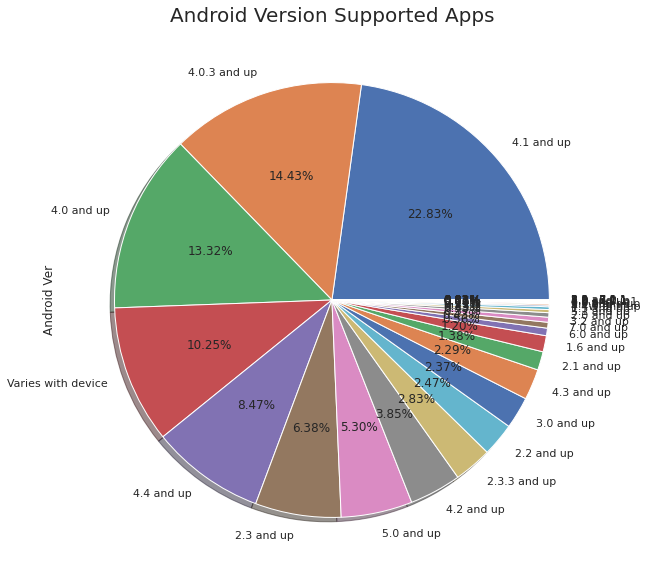

In [ ]:
plt.figure(figsize=(15,10))
AndroidVer_count.plot(kind = 'pie',autopct='%1.02f%%',shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

**Summary**: After percentage frequency distribution of data,

 we conclude that-

android version 4.0 and above supported apps is very higher and more than 60% of total app support.

**Frequency of apps in each category ?**
--

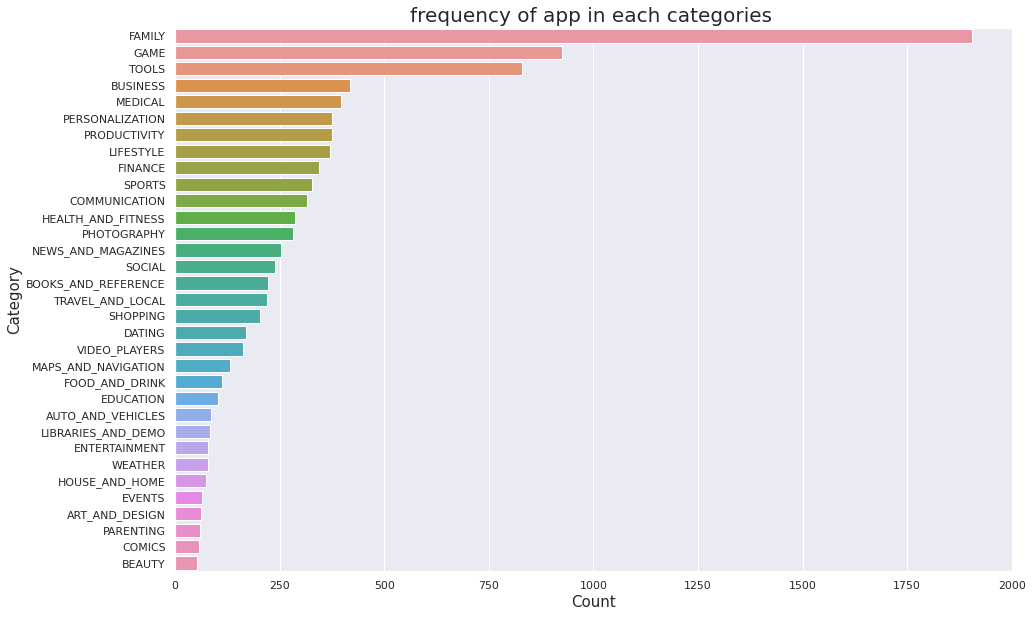

In [ ]:
plt.figure(figsize=(15,10))

y = play_store_data2['Category'].value_counts().index
x = play_store_data2['Category'].value_counts()
sns.barplot(x, y)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Category",fontsize=15)
plt.title("frequency of app in each categories ", fontsize = 20);

**Summary**:
From above Bar chart,

we conclude that-

most of the apps on play Store belongs to family category.

**Genres wise top apps in playstore**
--

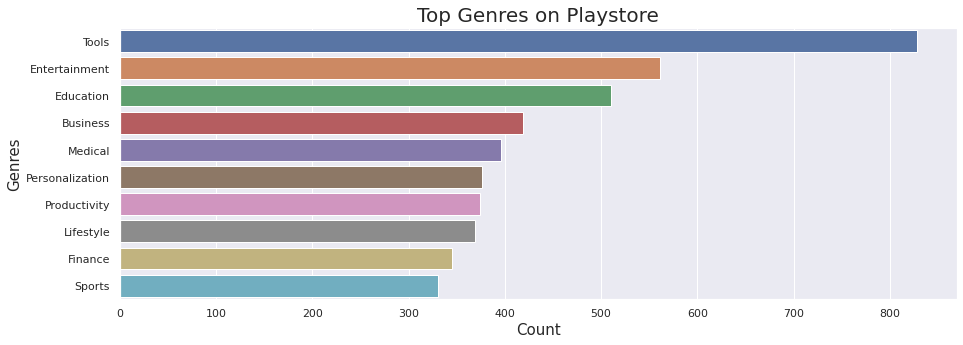

In [ ]:
y = play_store_data2['Genres'].value_counts().index
x = play_store_data2['Genres'].value_counts().head(10)
X = []
Y= []
for i in range(len(x)):
    X.append(x[i])
    Y.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genres",fontsize=15)

graph = sns.barplot(x = X, y = Y)
graph.set_title("Top Genres on Playstore", fontsize = 20)
plt.show()

**summary:**
Tools genre have the highest count followed by Entertainment

**Most Frequent Rating on playstore Apps**
--

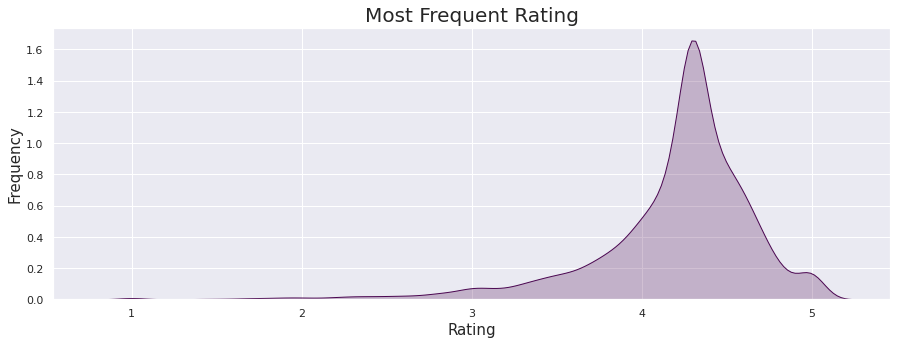

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(play_store_data2.Rating, color="#4B0751", shade = True)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title('Most Frequent Rating',size = 20)
plt.show()

**Summary**:

from the above graph, we conclude that most of the Apps in Play Store are rated in the region of 4 to 4.8.

**Distribution of Free and Paid App**
--

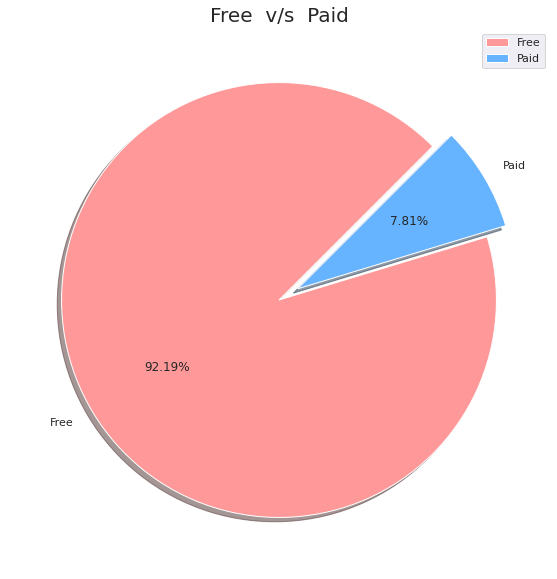

In [ ]:
plt.figure(figsize=(15,10))
x=play_store_data2.Type.value_counts()
Colors = ['#ff9999','#66b3ff']
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True,explode=[ 0, 0.1],startangle=45,colors=Colors)
plt.title("Free  v/s  Paid", fontsize=20)
plt.legend()
plt.show()

**Summary-4**:

* Free apps in playstore are 92.19%

* Paid apps in playstore are 7.81%



**App Updation Details By Year**
--

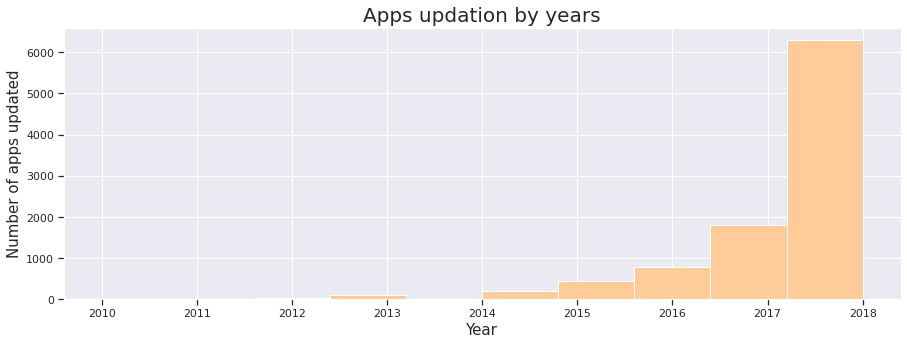

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Apps updation by years", fontsize=20)
ax = plt.hist(play_store_data2.LastUpdated_Year, color="#ffcc99")
plt.tick_params(left='on', bottom='on') 
plt.xlabel("Year",size=15)
plt.ylabel("Number of apps updated",size=15)
plt.show() 

In [ ]:
m1=play_store_data2[play_store_data2["Type"]=="Free"]
m1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5734.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


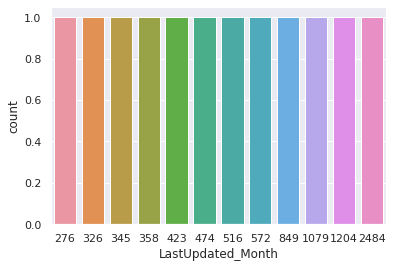

In [ ]:
#sns.barplot(play_store_data2["LastUpdated_Month"],m1["Type"])
h=pd.value_counts(m1["LastUpdated_Month"]).sort_values()
sns.countplot(h)

**Summary:** 
from the above graph,

we conclude that -

most of the last update of apps on Play Store are in the year of 2017 and 2018.

**Distribution of Content Rating for all app**
--

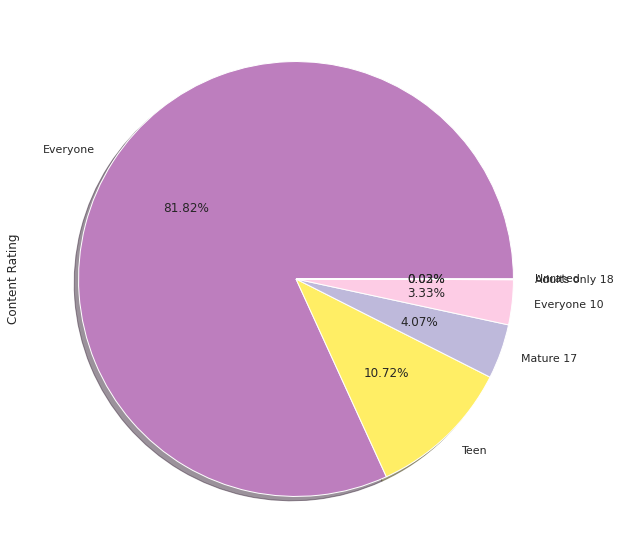

In [ ]:
plt.figure(figsize=(15,10))
colors=["#bd7ebe", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
pd.value_counts(play_store_data2["Content Rating"]).plot(kind = 'pie',  autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

**Summary:**
from the above pie chart,

we conclude that most of the app in Play Store is accessible by everyone.

**Content Rating in Free and Paid**
--

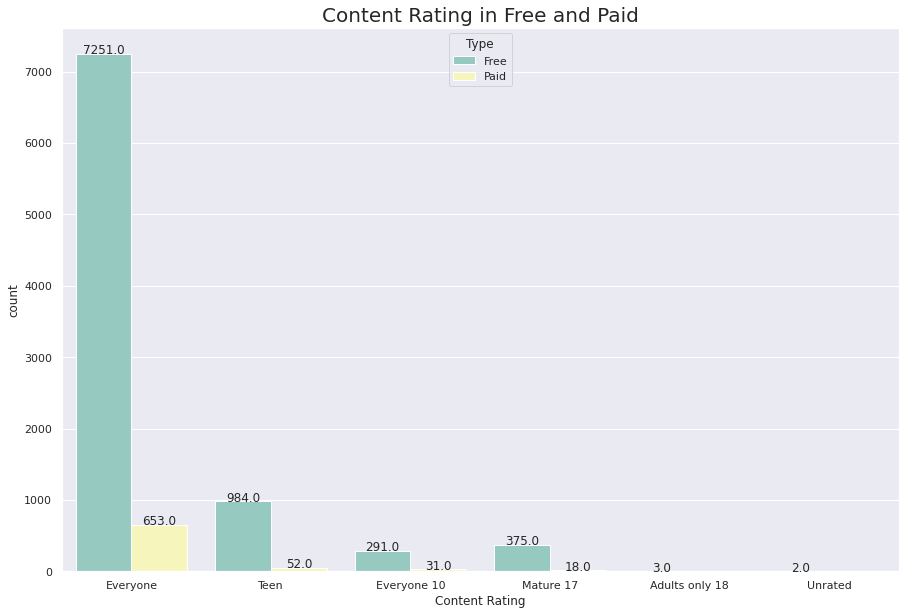

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.countplot(play_store_data2['Content Rating'],hue=play_store_data2['Type'],palette="Set3")

plt.title("Content Rating in Free and Paid",size=20)

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Summary:**
from the above chart,

 we conclude that:

 most of the apps in PlayStore are free and accessible by everyone.

<BarContainer object of 9660 artists>

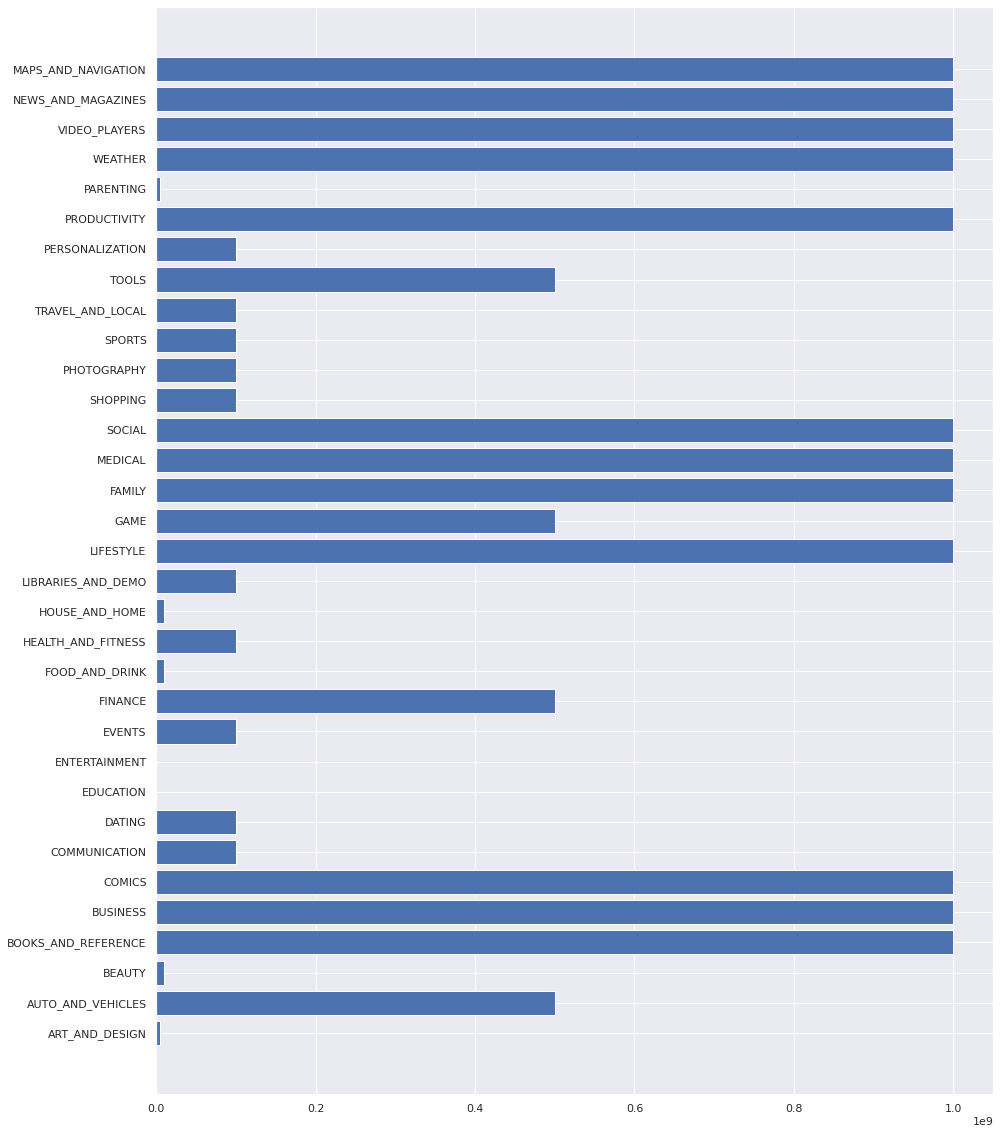

In [ ]:
#install v/s category
plt.figure(figsize=(15,20))
plt.barh(play_store_data2["Category"],play_store_data2["Installs"])

**Apps Size Across Database**
-- 

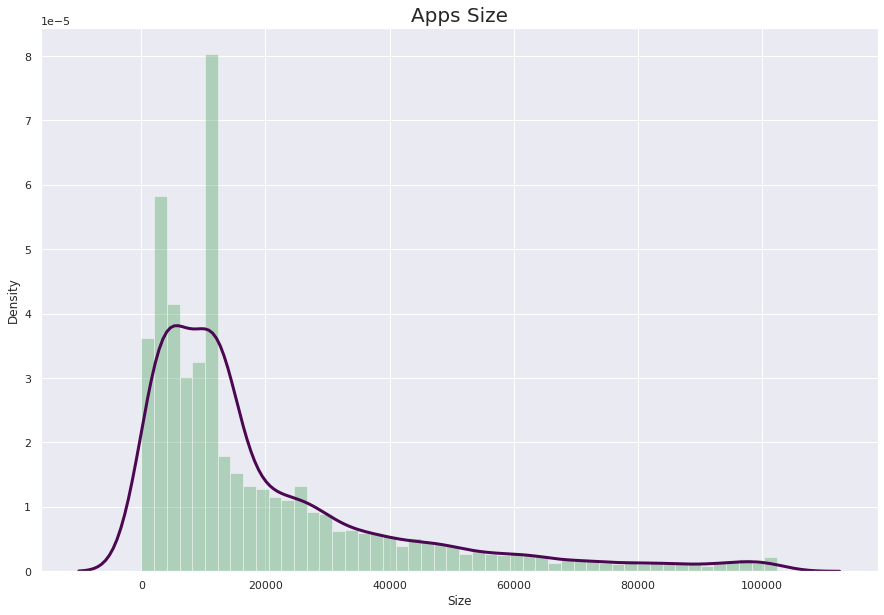

In [ ]:
#Histogram for Size
plt.figure(figsize=(15,10))
sns.distplot(play_store_data2['Size'],color='g',kde_kws={'linewidth':3,'color':'#4B0751'});
plt.title("Apps Size",size=20)
plt.show()

**Summary:**
we conclude that-

most of the apps in playstore of size between 0 to 20000kb.

In [ ]:
#merge both database for more analysis

merged_df = play_store_data2.merge(user_review_data3, on="App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.775558e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Negative,-3.472222e-02,0.581944


In [ ]:
#for numerical data
num_df_columns1=[columns for columns in merged_df.columns if merged_df[columns].dtype!='O']
num_df2=merged_df[num_df_columns1].drop(columns=['LastUpdated_Day','LastUpdated_Month',"LastUpdated_Year"])
num_df2

,Rating,Reviews,Size,Installs,Price,Last Updated,Sentiment_Polarity,Sentiment_Subjectivity
0,4.4,13791,33792.0,1000000,0.0,2017-09-20,2.166667e-01,0.573810
1,4.4,13791,33792.0,1000000,0.0,2017-09-20,0.000000e+00,0.000000
2,4.4,13791,33792.0,1000000,0.0,2017-09-20,3.000000e-01,0.600000
3,4.4,13791,33792.0,1000000,0.0,2017-09-20,2.775558e-17,0.579167
4,4.4,13791,33792.0,1000000,0.0,2017-09-20,-3.472222e-02,0.581944
...,...,...,...,...,...,...,...,...
25746,4.4,36981,4096.0,1000000,0.0,2018-07-06,3.454545e-01,0.484848
25747,4.4,36981,4096.0,1000000,0.0,2018-07-06,0.000000e+00,0.000000
25748,4.4,36981,4096.0,1000000,0.0,2018-07-06,4.937500e-01,0.700000
25749,4.4,36981,4096.0,1000000,0.0,2018-07-06,5.351190e-01,0.714286


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25751 entries, 0 to 25750
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     25751 non-null  object        
 1   Category                25751 non-null  object        
 2   Rating                  25751 non-null  float64       
 3   Reviews                 25751 non-null  int64         
 4   Size                    25751 non-null  float64       
 5   Installs                25751 non-null  int64         
 6   Type                    25751 non-null  object        
 7   Price                   25751 non-null  float64       
 8   Content Rating          25751 non-null  object        
 9   Genres                  25751 non-null  object        
 10  Last Updated            25751 non-null  datetime64[ns]
 11  Current Ver             25751 non-null  object        
 12  Android Ver             25751 non-null  object

**Sentiment Data Across all Reviews**
--

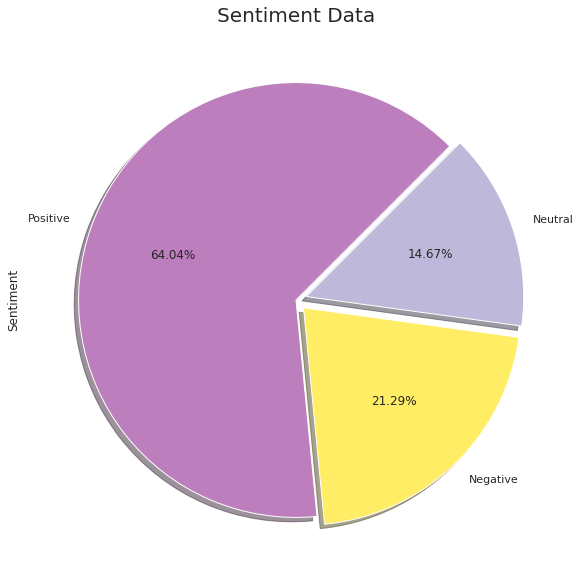

In [ ]:
plt.figure(figsize=(15,10))
pd.value_counts(user_review_data3["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 ,colors=colors)
plt.title("Sentiment Data",size=20)
plt.show()

**Trend of App Price across popular categories**
--

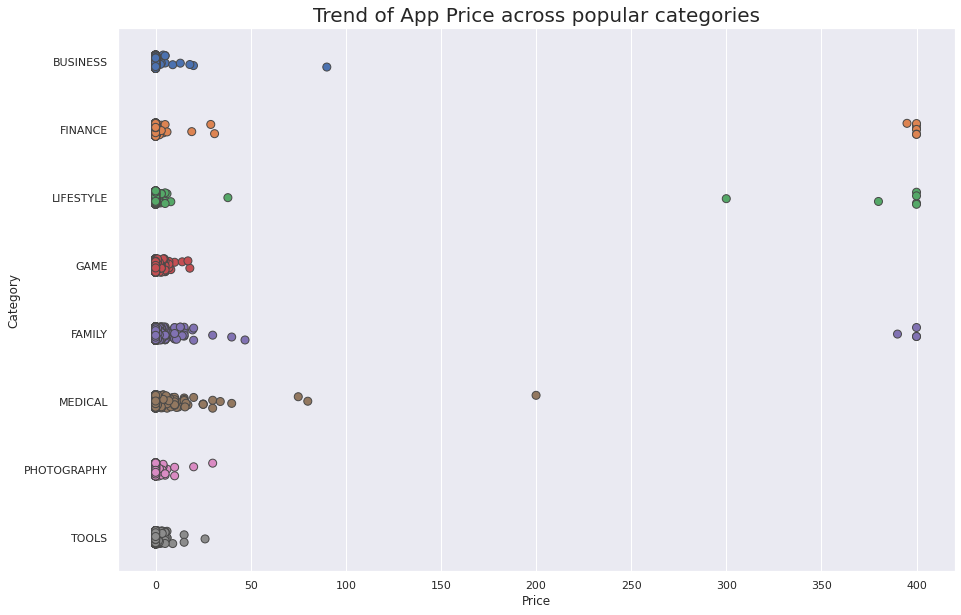

In [ ]:
plt.figure(figsize=(15,10))

# Select a few popular app categories
popular_app_cats = play_store_data2[play_store_data2.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
ax.set_title('Trend of App Price across popular categories',size=20)
plt.show()

**Age vs Sentiment: each age with its Positive, Negative, Neutral Sentiment**
--

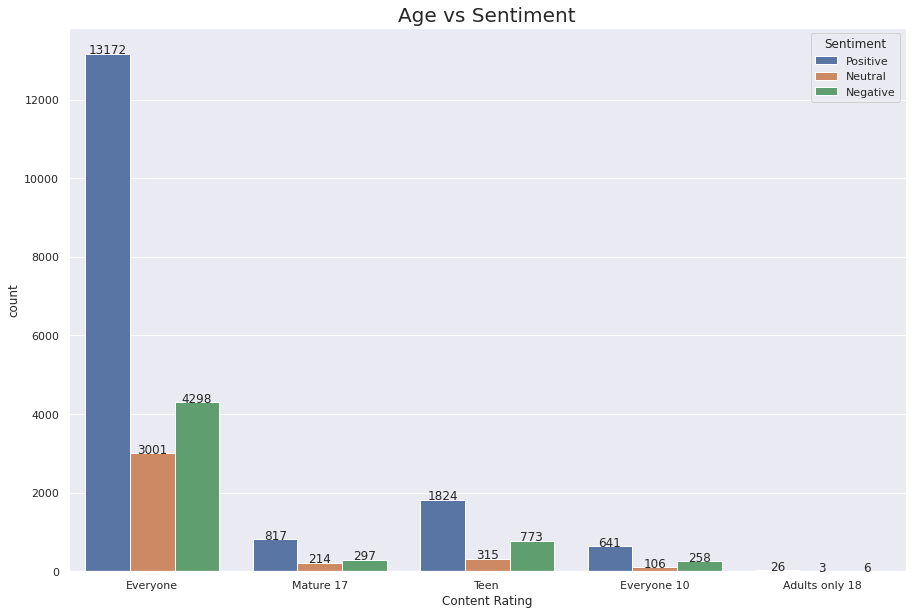

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(merged_df["Content Rating"],hue=merged_df['Sentiment'],palette="Set3");
plt.title("Age vs Sentiment",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)

plt.show()

**Feedback in Popular app category**
--

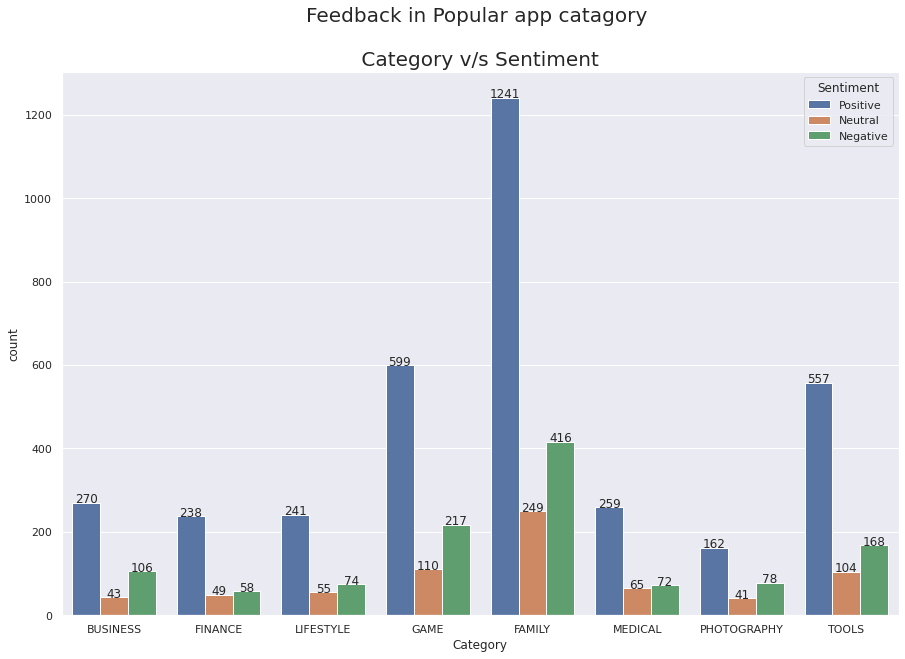

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Sentiment']);
ax.set_title("Feedback in Popular app catagory \n \n Category v/s Sentiment ",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Popular Category vs Type**
--

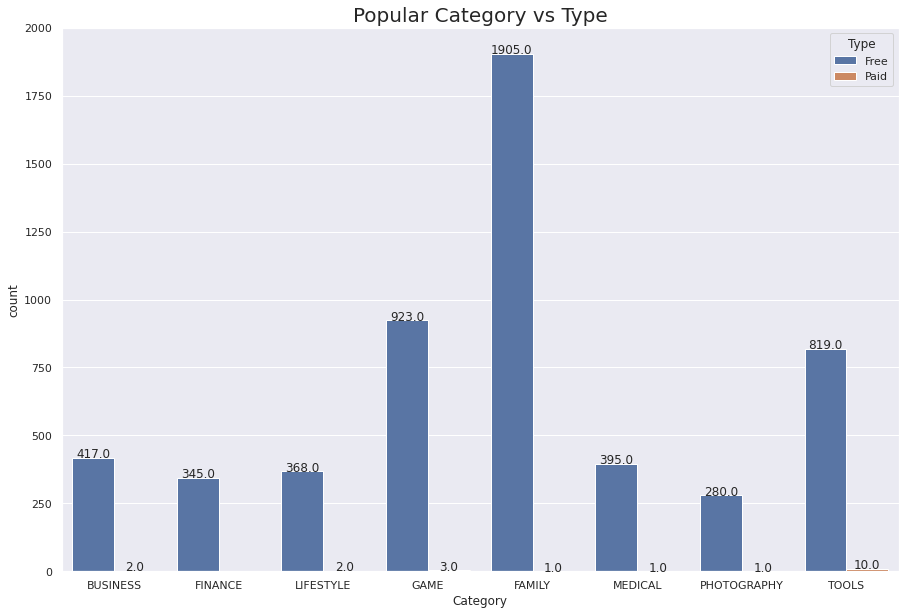

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Type']);
plt.title("Popular Category vs Type",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Sentiment_Polarity relation with paid and Free App**
--

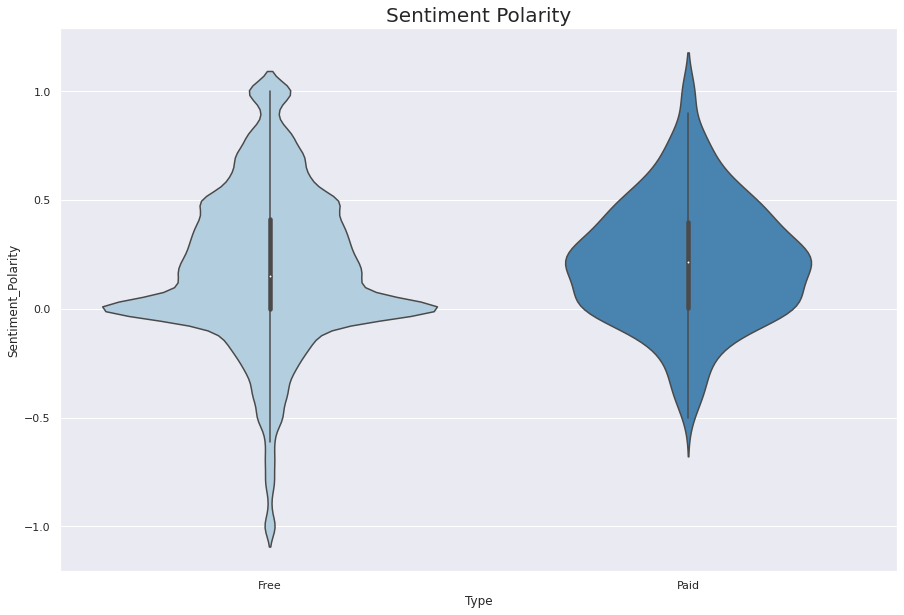

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(y = merged_df["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.title("Sentiment Polarity",fontsize=20)
plt.show()

**Content Rating Relation with Sentiment Polarity**
--

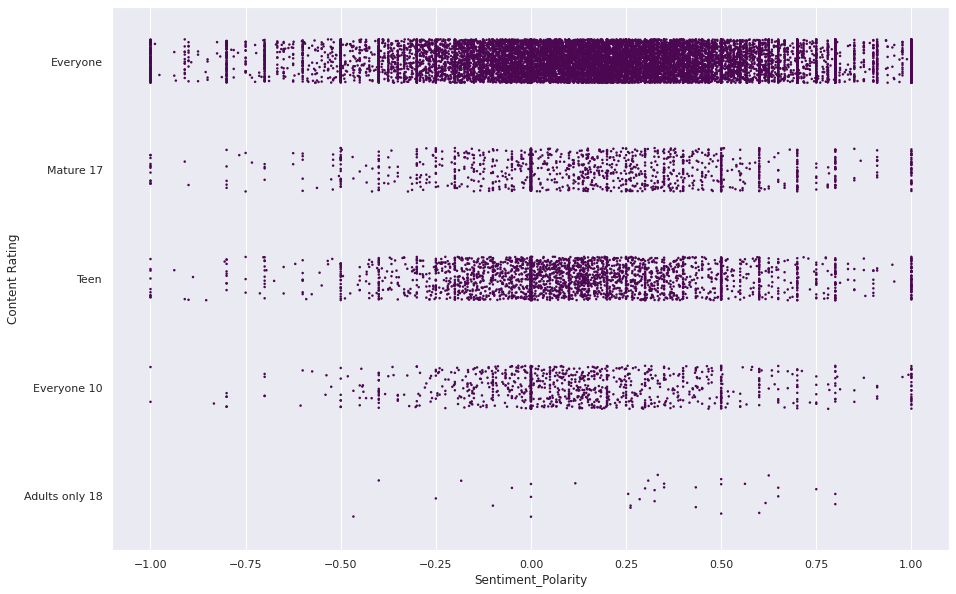

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.stripplot(y = merged_df["Content Rating"], x = merged_df["Sentiment_Polarity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Categories Relation with Sentiment_Subjectivity**
--

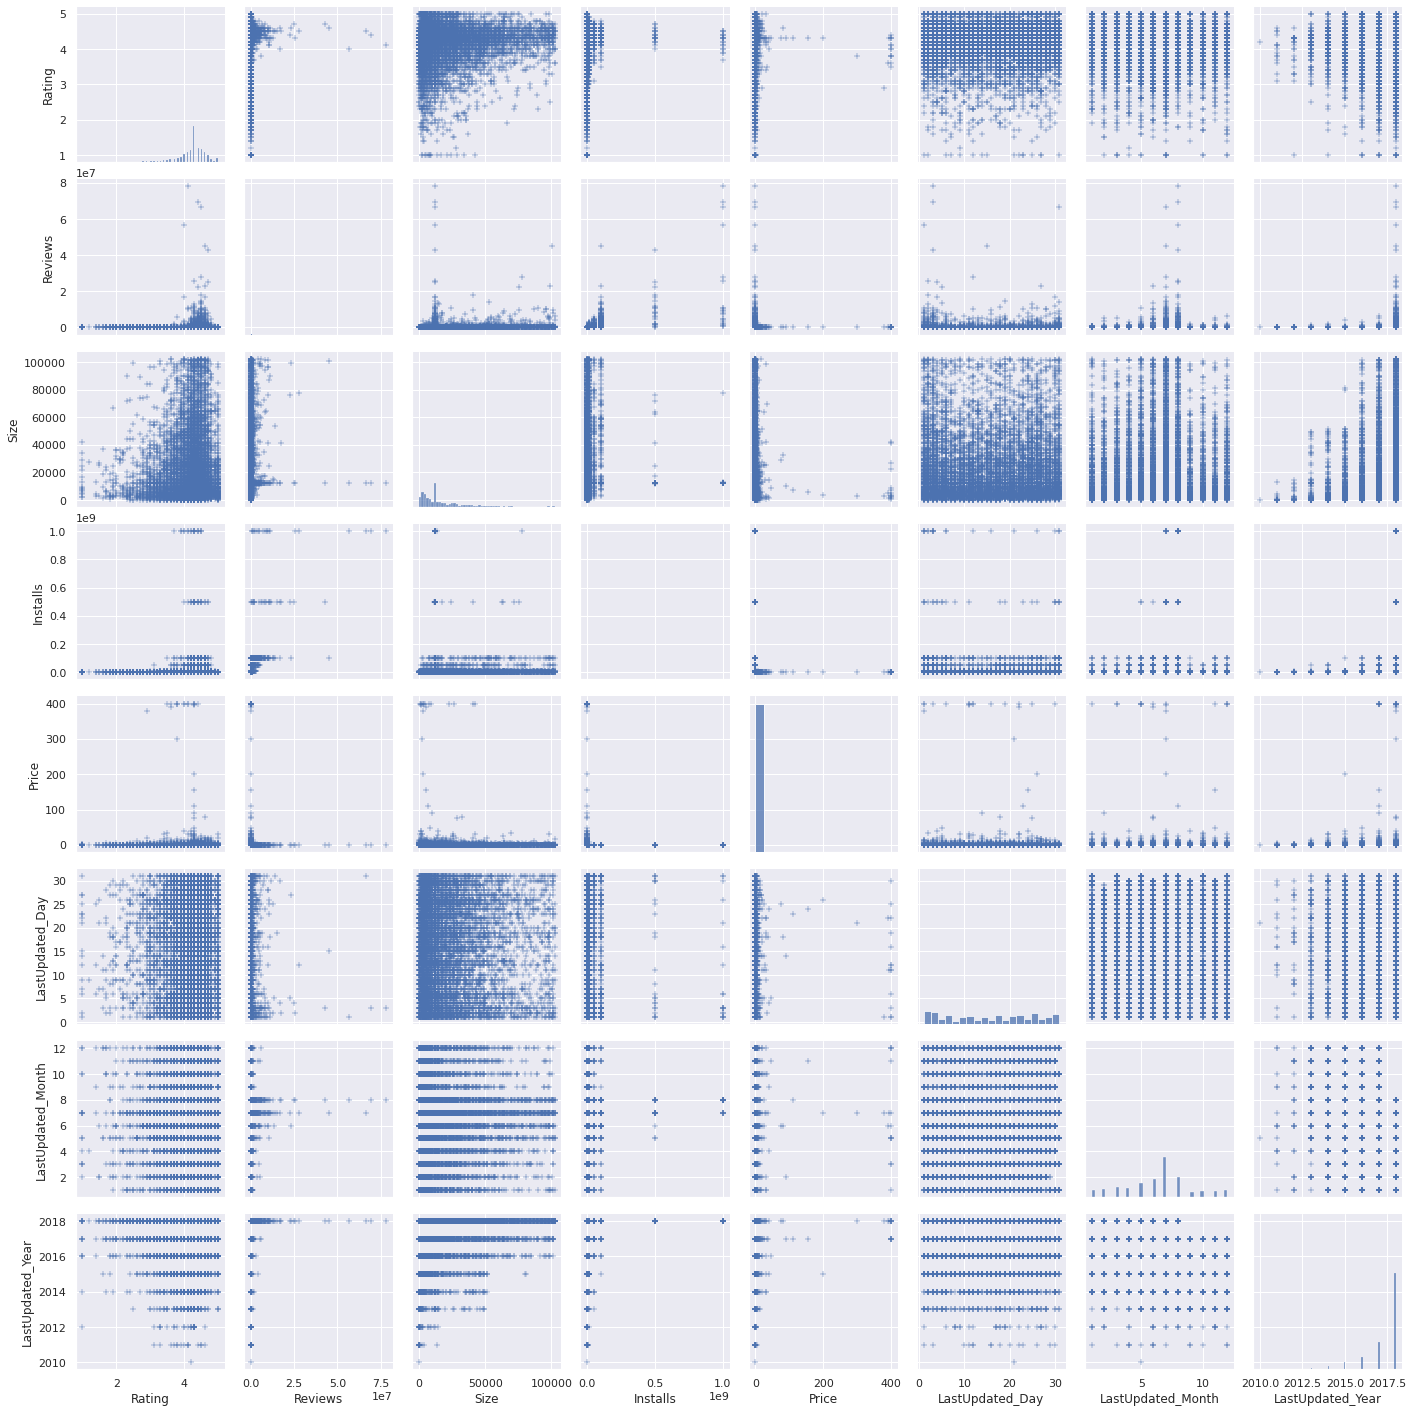

In [ ]:
data = sns.pairplot(num_df, markers='+')
plt.show(data)

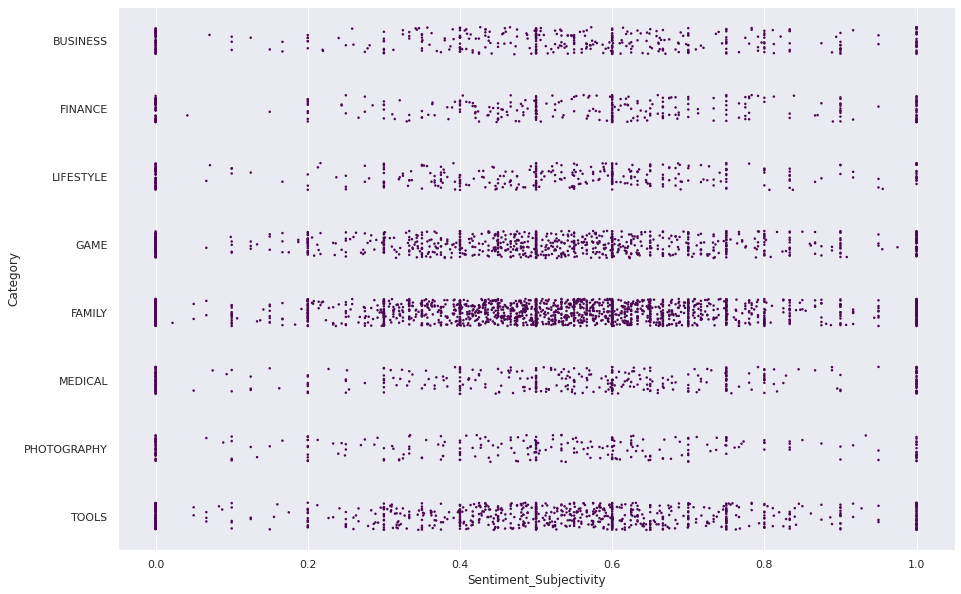

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = popular_app_cats['Category'], x = merged_df["Sentiment_Subjectivity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Pair Plot For Understanding Relations Between Different Columns**
--

In [2]:
# data = sns.pairplot(num_df, markers='+')
# plt.show(data)

**Summary-2**: Following are main conclusion:
--

### A)	Install vs Rating 📈  --	apps with Rating 4 and above have more installation than any other apps with lower rating!

### B)	Size vs Rating 📈 	-- Mostly larger size app's are rated and near 4 rate!

**Relation between all the columns**
--

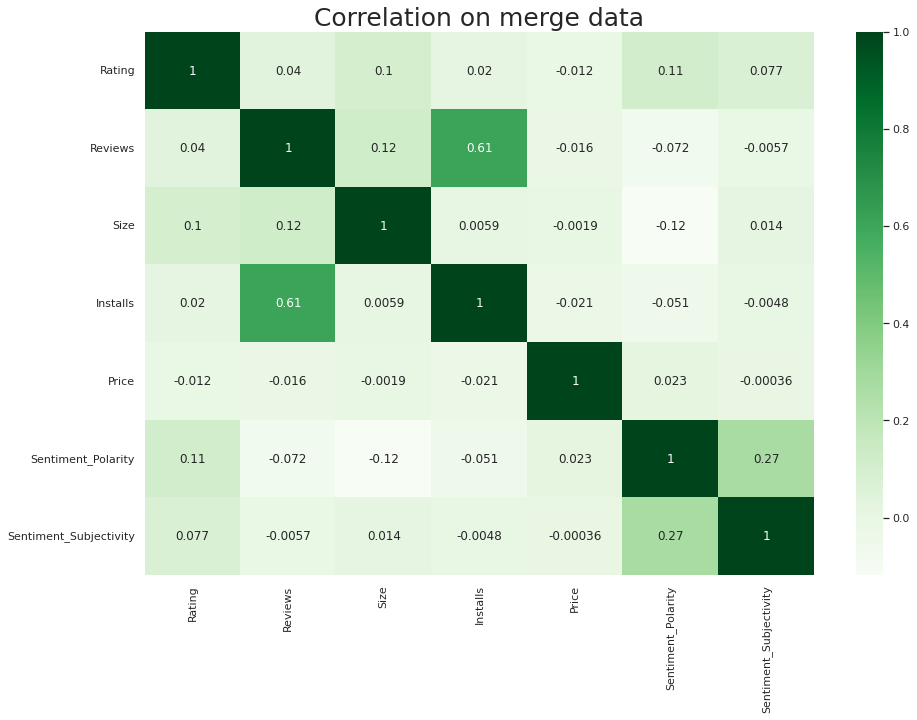

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df2.corr(),annot=True,cmap='Greens')
plt.title("Correlation on merge data",fontsize=25)
plt.show()

In [ ]:
#revenue=installs*price
play_store_data2["Price"]

0        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9660, dtype: float64

In [ ]:
list1=[]
for i,j in zip(play_store_data2["Installs"],play_store_data2["Price"]):
  d=i*j
  list1.append(d)

print(list1)  

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
Revenue=pd.DataFrame(list1)
Revenue

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9655,0.0
9656,0.0
9657,0.0
9658,0.0


In [ ]:
df4=play_store_data2.merge(Revenue)

MergeError: ignored